# COGS 108 - Final Project 

# Overview

For our project, we wanted to analyze how often homophobic slurs occurred on the Year end billboard top 100 charts. We took multiple data sets from online and created data set of our own for survey results. We ended up running into issues with not enough data after trying to analyse the level of homphobic so we switched gears and analyzed the sentiment of the songs instead.

# Names

- Timothy Walker
- Christie Wolters
- Adrian Jacinto
- Chiu Chin
- Anthony Ayon


# Group Members IDs

- A14191564
- A14768205
- A12779639
- A13007687
- A12102395


# Research Question

 Is there a correlation between music ranking on the Year End billboard hot 100 charts and homophobic words or phrases of a songs lyrics?

## Background and Prior Work

We know that homophobic and misogynistic lyrics are present within a wide range of music genres. More specifically, hip-hop and rap music is notable for promoting them. Music has always been about freely expressing the artist’s creativity, however, sometimes their lyrics are misunderstood. Homophobic and misogynistic lyrics in genres most notably hip-hop and rap genre is very prevalent in reinforcing these stereotypes and promote hostility against these groups. Lyrics that describe masculinity and homosexuality through insult or “dissing” are very common among songs withing the rap genere. Other genres such as pop music also have some notion of homophobic or sexist lyrics. For example, Katy Perry released a song about her ex-boyfriend and describes her hatred being in a relationship with him using homophobic lyrics.
 
Furthermore, country music can also promote masculinity and express homophobia. For example, a country music group named “Big & Rich” rants about how the legalization of gay marriage can result in legalizing other phobic things. Likewise, we can observe the prevalent use of these terms not just for personal expression but also to add commentary on several political issues that are controversial within the time period that the song was made.

We found a similar project called “Using Python to Analyze Billboard Top 100 Pop Songs”. This group used a kaggle data set containing 50 years of Top Pop songs from 1964-2015 that had columns for Rank, Song, Artist, Year, Lyrics, Source. The lyrics for these songs they analyzed by Sentiment using the sentiwordnet interface. They also analyzed the repetitiveness of songs using compression. This group had to remove repetitive words in their analysis when they ran it through sentiwordnet. This might be something we will have to do with our dataset. This group also used a scatterplot and linear regression to map sentiment. We may have to attempt a similar approach.

Sources:
https://www.liveabout.com/homophobia-in-music-1415303
https://github.com/COGS108/FinalProjects-Sp17/blob/master/092-FinalProject.ipynb

# Hypothesis


For our hypothesis, we believe that when our analysis is complete, we will find that there is a strong correlation between the rankings of a song and the level of homophobia in the lyrics. We believe this due to the level in which homophobia is allowed in society during the year from 2000 to 2010.

# Dataset(s)

We will be utilizing multiple data sets to answer our question.

First we needed a data set that contains the ranking and placement of songs on the various billboard charts.


The following are data sets that were aquired by web scraping billboard.com.






- Dataset Name: adult-pop-songs.csv, alternative-rock-songs.csv, country-songs.csv, hot-mainstream-rock-tracks.csv, r-b-hip-hop-songs.csv, rap-song.csv, pop-songs.csv

- Link to the dataset: https://github.com/Timothy-W/COGS108-Group-152-Final-Project/tree/master/data

- Number of observations: 972.

These data sets were aquired by using a small python webscraping script. Of the seven files, each file is named after the chart on billboard.com which inturn is its genre. Each file contains the songs that hit number 1 for the years 2000 to 2010.


- Dataset Name: Year_End_Hot_100_2000-2010-Wikipedia.csv
- Link to the dataset: https://github.com/Timothy-W/COGS108-Group-152-Final-Project/blob/master/data/Year_End_Hot_100_2000-2010-Wikipedia.csv
- Number of observations: 1100.

This is a dataset containing the top 100 songs, over all genres for the years of 2000 to 2010. This data set was collected by hand from Wikipedia.


- Dataset Name: GoogleFormResponses.csv, COGS108Survey.csv
- Link to the dataset: https://github.com/Timothy-W/COGS108-Group-152-Final-Project/tree/master/data
- Number of observations: 35.

These data sets are survey results that were conducted to collect a lexicon of homophobic and misogynistic words and phrases.


- Dataset Name: wikipedia_homophobic_slurs_men.csv, wikipedia_homophobic_slurs_women.csv
- Link to the dataset: https://en.wikipedia.org/wiki/List_of_LGBT_slang_terms
- Number of observations: 136




These dataset were collected by hand from wikipedia and contain homophobic slurs for men and women.



- Dataset Name: chart_with_lyrics
- Link to the dataset: https://github.com/Timothy-W/COGS108-Group-152-Final-Project/blob/master/data/chart_with_lyrics.csv
- Number of observations: 1100

This dataset contains the title, artists and lyrics of songs that we will be match to our ratings datasets for our analysis. This dataset was built by taking our 'Year_End_Hot_100_2000-2010-Wikipedia.csv' dataset and looking up the songs using PyLyrics (LINK HERE). 




# Setup

In [1]:
#Imports
import pandas as pd
import numpy as np
#from PyLyrics import *
import time
import re
import scipy
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer


In [2]:
#Create dataframes for billboard.com ratings
adult_pop_df = pd.read_csv(filepath_or_buffer='data/adult-pop-songs.csv')
alt_rock_df = pd.read_csv(filepath_or_buffer='data/alternative-rock-songs.csv')
country_df = pd.read_csv(filepath_or_buffer='data/country-songs.csv')
mainstream_rock_df = pd.read_csv(filepath_or_buffer='data/hot-mainstream-rock-tracks.csv')
rb_hiphop_df = pd.read_csv(filepath_or_buffer='data/r-b-hip-hop-songs.csv')
rap_df = pd.read_csv(filepath_or_buffer='data/rap-song.csv')
pop_df = pd.read_csv(filepath_or_buffer='data/pop-songs.csv')

#Create dataframe for year end hot 100, years 2000 to 2010
year_end_hot100_df = pd.read_csv(filepath_or_buffer='data/Year_End_Hot_100_2000-2010-Wikipedia.csv')

#Create dataframes for homophobics/misogynistic lexicon
survey_A_df = pd.read_csv(filepath_or_buffer='data/GoogleFormResponses.csv')
survey_B_df = pd.read_csv(filepath_or_buffer='data/COGS108Survey.csv')

homophobic_slurs_men = pd.read_csv(filepath_or_buffer='data/wikipedia_homophobic_slurs_men.csv')
homophobic_slurs_women = pd.read_csv(filepath_or_buffer='data/wikipedia_homophobic_slurs_women.csv')


To create our data frame that contains the rankings, song title, artist and lyrics we used PyLyrics. The code to manually fix ht song title or artist of our ranking chart as well as utilize PyLyrics to fetch the lyrics for the songs is located in Appendix A.

In [3]:
#Create dataframe of song lyrics
chart_with_lyrics_df = pd.read_csv(filepath_or_buffer='data/chart_with_lyrics.csv')

# Display dataframe
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(chart_with_lyrics_df)


# Data Cleaning

## Clean the lyrics data

TODO: Nothing atm

In [4]:
def clean_lyrics(string):
    
    string = string.lower()
    
    # Drop all whitespace
    string = string.strip()
    
    # Replace things (and then strip again afterwords)
    #  Note that the 'replace' replaces the first argument, with the second
    #   The first argument does not need to be present in the string,
    #    if it's not there 'replace' does nothing (but does not error), so the code moves on.
    string = string.replace('\n', ' ')
    string = string.replace(',', '')
    string = string.replace('.', '')
    string = re.sub(r'\[.*\]', ' ', string)  #re.sub(regex, Replacement string, original string )
    string = string.replace(';', '')
    string = string.replace(':', '')
    string = string.replace('?', '')
    string = string.replace('-', ' ')
    string = string.replace('(', '')
    string = string.replace(')', '')
    string = string.replace('"', '')
    string = string.replace("'", '')
    string = string.strip()
    
    return string

chart_with_lyrics_df['lyrics'] = chart_with_lyrics_df['lyrics'].apply(clean_lyrics)


#checking for duplicates in dataset
chart_with_lyrics_df.sort_values("rank", inplace = True) 
#removing lower ranking duplicates from dataset & leaving highest ranking
chart_with_lyrics_df.drop_duplicates(subset =['title','artist'], keep = 'first', inplace = True) 


#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #display(chart_with_lyrics_df)

In [5]:
word_list = []
stop_words = set(stopwords.words('english'))
for index, row in chart_with_lyrics_df.iterrows():
    word_tokens = word_tokenize(row['lyrics'])
    filtered_words = [word for word in word_tokens if not word in stop_words]
    
    words = []
    for word in filtered_words:
        #stemmed_word = PorterStemmer().stem(word)
        words.append(word)
    word_list.append(words)
    
chart_with_lyrics_df['tokenized_lyrics'] = word_list

## Clean survey response and wikipedia slur datasets

Next we are going to clean the survey responses and the slurs that were found on wikipedia. When they are cleaned they will be turned into one array/dataframe to use later.

Unneeded data at the end of the surveys is also dropped

Here we clean 'Google Survey A' and condense it into a single data frame with no duplicates.

In [6]:
survey_A_df.drop(columns=['Timestamp', '#1.1', '#2.1', '#3.1', '#4.1', '#5.1', '#6.1', '#7.1', '#8.1', '#9.1', '#10.1'], inplace=True) # drop Timestamp and LGBTQ membership column

#Bring gender question column to front
survey_A_df = survey_A_df[['Do you identify as a member of the LGBTQ community?','What gender do you identify as?', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10']]

survey_A_all_df = survey_A_df.drop(columns=['What gender do you identify as?','Do you identify as a member of the LGBTQ community?'])
survey_A_all_df = pd.concat(objs=[survey_A_all_df['#1'], survey_A_all_df['#2'], survey_A_all_df['#3'], survey_A_all_df['#4'], survey_A_all_df['#5'], survey_A_all_df['#6'], survey_A_all_df['#7'], survey_A_all_df['#8'], survey_A_all_df['#9'], survey_A_all_df['#10']] ,ignore_index=True)

survey_A_all_df = survey_A_all_df.str.lower()
survey_A_all_df = (survey_A_all_df.str.strip()).to_frame()
survey_A_all_df.columns = ['slurs']
survey_A_all_df.dropna(inplace=True)
survey_A_all_df.drop_duplicates(inplace=True)
survey_A_all_df.drop(survey_A_all_df.index[[4,16]], inplace=True)
survey_A_all_df.iat[14, 0] = 'mallate'
survey_A_all_df.reset_index(inplace=True)
survey_A_all_df.drop(columns=['index'], inplace=True)


Here we clean 'Google Survey B' and condense it into a single data frame with no duplicates.

In [7]:
#Clean survey data
survey_B_df.columns = ['Num', 'A', 'B', 'C']
survey_B_df.drop(columns=['Num'], inplace=True)

#Clean homophobic responses from COGS108Survey.csv google survey
survey_b_homo = pd.concat(objs=[survey_B_df.head(n=10)['A'], survey_B_df.head(n=10)['B'], survey_B_df.head(n=10)['C']], ignore_index=True)
survey_b_homo = survey_b_homo.str.lower()
survey_b_homo = survey_b_homo.str.strip()
survey_B_df = survey_b_homo.to_frame()
survey_B_df.columns = ['slurs']
survey_B_df.dropna(inplace=True)
survey_B_df.drop_duplicates(inplace=True)

#Looks good
#survey_B_df



We combine the wikipedia slur dataset, 'survey_A_all_df' and 'survey_B_df' into a single datafram/array called 'lexicon_all_df'

In [8]:
homophobic_slurs_men.columns = ['slurs']
homophobic_slurs_women.columns = ['slurs']

def strip_n_lower (string):
    return ((string).lower()).strip()

lexicon_all_df = pd.concat(objs=[homophobic_slurs_men, homophobic_slurs_women, survey_A_all_df, survey_B_df], sort=True)
lexicon_all_df["slurs"] = lexicon_all_df["slurs"].apply(strip_n_lower)
lexicon_all_df.reset_index(inplace=True)
lexicon_all_df.drop(columns=['index'], inplace=True)


# Looks good
#print(lexicon_all_df)

Next we use 'survey_A_df' that we cleaned previously to create a datafram with homophobic words that have been entered from individuals that are part of the LGBTQ community.

In [9]:

#Clean homophobic slurs from GoogleFormResponses.csv google survey
survey_A_df.drop(survey_A_df.loc[survey_A_df['Do you identify as a member of the LGBTQ community?'] == 'No'].index, inplace=True)

#Drop members inclusion question now that we have isolated the 'Yes' responses.
survey_A_df.drop(columns=['Do you identify as a member of the LGBTQ community?'], inplace=True)

#GENDER DROPPED HERE
lexicon_com_df = survey_A_df.drop(columns=['What gender do you identify as?'])


lexicon_com_df = pd.concat(objs=[lexicon_com_df['#1'], lexicon_com_df['#2'], lexicon_com_df['#3'], lexicon_com_df['#4'], lexicon_com_df['#5'], lexicon_com_df['#6'], lexicon_com_df['#7'], lexicon_com_df['#8'], lexicon_com_df['#9'], lexicon_com_df['#10']] ,ignore_index=True)
lexicon_com_df = lexicon_com_df.str.lower()
lexicon_com_df = (lexicon_com_df.str.strip()).to_frame()
lexicon_com_df.columns = ['slurs']
lexicon_com_df.dropna(inplace=True)
lexicon_com_df.drop_duplicates(inplace=True)
lexicon_com_df.drop(lexicon_com_df.index[[4,16]], inplace=True)
lexicon_com_df.iat[14, 0] = 'mallate'
lexicon_com_df.reset_index(inplace=True)
lexicon_com_df.drop(columns=['index'], inplace=True)

# Looks good
#lexicon_com_df

## Getting Homophobic Word Count for Each Song

Dont think we need this section becase we might not be using the billboard 100 stuff.


In [10]:
#method to count number of homophobic words
#homolist = list(lexicon_all_df['slurs'])
homolist = ['faggot', 'fag', 'gay', 'dyke', 'tranny', 'mallate', 'homo', 'cocksucker', 'lesbo', 'nohomo', 'queer']

def numHomo(lyriclist):
    occurances = 0
    for lyric in lyriclist:
        for homoword in homolist:
            if homoword in lyric:
                occurances = occurances + 1
    return occurances

chart_with_lyrics_df['numhomo'] = chart_with_lyrics_df['tokenized_lyrics'].apply(numHomo)
chart_with_lyrics_df.sort_values("numhomo", inplace = True)
#display(chart_with_lyrics_df)
display(chart_with_lyrics_df)

,year,rank,title,artist,lyrics,tokenized_lyrics,numhomo
0,2000,1,Breathe,Faith Hill,i can feel the magic floating in the air being...,"[feel, magic, floating, air, gets, way, watch,...",0
963,2009,64,She Wolf,Shakira,sos shes in disguise sos shes in disguise ther...,"[sos, shes, disguise, sos, shes, disguise, the...",0
663,2006,64,Bossy,Kelis,hey a you dont have to love me you dont even h...,"[hey, dont, love, dont, even, like, respect, k...",0
463,2004,64,Read Your Mind,Avant,listen ive been waiting to tell you this you a...,"[listen, ive, waiting, tell, man, could, ever,...",0
63,2000,64,I Wish,Carl Thomas,it was love at first sight i know from the way...,"[love, first, sight, know, way, looked, eyes, ...",0
563,2005,64,Incomplete,Backstreet Boys,empty spaces fill me up with holes distant fac...,"[empty, spaces, fill, holes, distant, faces, p...",0
764,2007,65,Let It Go,Keyshia Cole,you need to get if he dont wanna love you the ...,"[need, get, dont, wan, na, love, right, way, a...",0
164,2001,65,The Space Between,Dave Matthews Band,you cannot quit me so quickly theres no hope i...,"[quit, quickly, theres, hope, corner, could, s...",0
64,2000,65,U Know What's Up,Donell Jones,ooh say what say what say what ooh girl you kn...,"[ooh, say, say, say, ooh, girl, know, whats, v...",0
564,2005,65,Bring Em Out,T.I.,intro jay z sample bring em out its hard to ye...,"[intro, jay, z, sample, bring, em, hard, yell,...",0


### Result of data cleaning

At the end of the data cleaning we have the following dataframes to work with;

 - Name: lexicon_com_df
 - Description: Dataframe of just the words from individuals that idetify as part of the LGBTQ community. Gender has been dropped in this dataframe.
 
 
 - Name: lexicon_all_df
 - Description: Dataframe containing all homophobic slurs from both google surveys and wikipedia that were collected. 
 
 
 - Name: chart_with_lyrics_df
 - Description: Dataframe containint song titles, artists, lyrics, and ranks of the year end hot 100 songs for the years 2000 to 2010


Viewing the results on our df, very few of our songs had results for a homophobic word search, and many were false positives.
We decides we would alter our research question to something more measurable.

# Adding Genre to DF

In [11]:
import requests
import bs4
from bs4 import BeautifulSoup

#using A3 for reference
hiphop_page = 'https://en.wikipedia.org/wiki/List_of_hip_hop_musicians'
page = requests.get(hiphop_page)
soup = BeautifulSoup(page.content, 'html.parser')


hiphop_list = []
for table in soup.find_all("div", class_="div-col columns column-width"):
    #hiphop_table = soup.find("div", class_="div-col columns column-width")
    table_size = len(table.find_all("li"))
    for i in range(0, table_size):
        paragraphs = table.find_all("li")[i].text
        hiphop_list.append(paragraphs)
#print(hiphop_list)


#using A3 for reference
rock_page = 'https://en.wikipedia.org/wiki/List_of_alternative_rock_artists'
page = requests.get(rock_page)
soup = BeautifulSoup(page.content, 'html.parser')


rock_list = []
for table in soup.find_all("div", class_="div-col columns column-width"):
    #hiphop_table = soup.find("div", class_="div-col columns column-width")
    table_size = len(table.find_all("li"))
    for i in range(0, table_size):
        paragraphs = table.find_all("li")[i].text
        rock_list.append(paragraphs)

In [12]:
def parseArtists(link):
    page = requests.get(link)
    soup = BeautifulSoup(page.content, 'html.parser')
    artist_list = []
    for table in soup.find_all("div", class_="div-col columns column-width"):
        table_size = len(table.find_all("li"))
        for i in range(0, table_size):
            paragraphs = table.find_all("li")[i].text
            artist_list.append(paragraphs)
        
    output = []
    for artist in artist_list:
        output.append(artist.split('[')[0])
    return output

rock_artists = parseArtists('https://en.wikipedia.org/wiki/List_of_alternative_rock_artists')
hiphop_artists = parseArtists('https://en.wikipedia.org/wiki/List_of_hip_hop_musicians')
jazz_artists = parseArtists('https://en.wikipedia.org/wiki/List_of_jazz_musicians')
dance_artists = parseArtists('https://en.wikipedia.org/wiki/List_of_dance-pop_artists')


In [13]:
rock_artists
hiphop_artists
jazz_artists
dance_artists

rock_df = pd.DataFrame(rock_artists, columns=['artist'])
rock_df['genre'] = 'alt rock'

hiphop_df = pd.DataFrame(hiphop_artists, columns=['artist'])
hiphop_df['genre'] = 'hiphop'

jazz_df = pd.DataFrame(jazz_artists, columns=['artist'])
jazz_df['genre'] = 'jazz'

dance_df = pd.DataFrame(dance_artists, columns=['artist'])
dance_df['genre'] = 'dance'

#dance_df = genre_df.append(hiphop_df)
#hiphop_df
genre_df = rock_df.append(hiphop_df)
genre_df = genre_df.append(jazz_df)
genre_df = genre_df.append(dance_df)

In [14]:
#merging genre_df with old dataframe
df = chart_with_lyrics_df.merge(genre_df, on='artist')

display(df)

,year,rank,title,artist,lyrics,tokenized_lyrics,numhomo,genre
0,2009,64,She Wolf,Shakira,sos shes in disguise sos shes in disguise ther...,"[sos, shes, disguise, sos, shes, disguise, the...",0,dance
1,2002,66,Underneath Your Clothes,Shakira,youre a song written by the hands of god dont ...,"[youre, song, written, hands, god, dont, get, ...",0,dance
2,2002,28,"Whenever, Wherever",Shakira,lucky you were born that far away so we could ...,"[lucky, born, far, away, could, make, fun, dis...",0,dance
3,2005,64,Incomplete,Backstreet Boys,empty spaces fill me up with holes distant fac...,"[empty, spaces, fill, holes, distant, faces, p...",0,dance
4,2000,31,Show Me the Meaning of Being Lonely,Backstreet Boys,show me the meaning of being lonely so many w...,"[show, meaning, lonely, many, words, broken, h...",0,dance
5,2001,65,The Space Between,Dave Matthews Band,you cannot quit me so quickly theres no hope i...,"[quit, quickly, theres, hope, corner, could, s...",0,alt rock
6,2005,65,Bring Em Out,T.I.,intro jay z sample bring em out its hard to ye...,"[intro, jay, z, sample, bring, em, hard, yell,...",0,hiphop
7,2006,95,Why You Wanna,T.I.,go and tell a nigga no with a ass so fat hey w...,"[go, tell, nigga, ass, fat, hey, wan, na, go, ...",0,hiphop
8,2005,79,U Don't Know Me,T.I.,you might see me in the street but nigga you d...,"[might, see, street, nigga, dont, know, ya, ho...",0,hiphop
9,2007,75,Big Shit Poppin' (Do It),T.I.,hey hey whatchu waitin for do it you better do...,"[hey, hey, whatchu, waitin, better, better, wh...",0,hiphop


In [15]:
all_lyrics = df['lyrics']
all_lyrics


0      sos shes in disguise sos shes in disguise ther...
1      youre a song written by the hands of god dont ...
2      lucky you were born that far away so we could ...
3      empty spaces fill me up with holes distant fac...
4      show me the meaning of being lonely  so many w...
5      you cannot quit me so quickly theres no hope i...
6      intro jay z sample bring em out its hard to ye...
7      go and tell a nigga no with a ass so fat hey w...
8      you might see me in the street but nigga you d...
9      hey hey whatchu waitin for do it you better do...
10     hey jill you know them old sugar daddies they ...
11     yeah hey hey hey hey hey what you know about t...
12     do your chain hang low do it wobble to da flo ...
13     fury ah  chorus repeat 4x game over flip flip ...
14     restless tonight cause i wasted the light betw...
15     i hold on so nervously to me and my drink i wi...
16     turn the lights on   every night i rest in my ...
17     nobody likes being playe

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [16]:
from nltk.probability import FreqDist
import string

most = df['tokenized_lyrics'].apply(pd.Series).stack()
print(len(most))

fdist_all = FreqDist(most)

for punc in string.punctuation:
    del fdist_all[punc]
    
    


104802


In [17]:
most = df['tokenized_lyrics'].apply(pd.Series).stack()

#fdist_all = FreqDist(most)
#print(fdist_all.most_common(10))
#nlkt_tokens = nltk.word_tokenize(most)
#print(list(nltk.word_tokenize(most)))

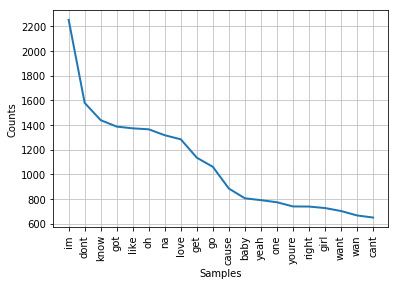

In [18]:
fdist_all.plot(20, cumulative=False)

The above chart plots out the 20 most common words in ALL the lyrics of all the songs in our dataframe. This gives us a baseline to compare our analysis of genres to, to see if the words differ, and by how much.

In [19]:
type(fdist_all)

nltk.probability.FreqDist

In [20]:
import nltk
from nltk.sentiment.util import *
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\toni_\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Analyzes for All Songs

In [21]:
def sentiment(songs):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(songs)
    return scores


In [22]:
#exmple 


In [23]:
def senti_metric(dataframe):
#lyrics = df_dance['lyrics']
    l = list(dataframe)

    score_result = []
    for i in l: 
        t = sentiment(i)
        score_result.append(t)
    score_result


    neg_vals= []
    pos_vals = []
    comp_vals = []
    measure = []
    for i in range(len(score_result)):
        negative= score_result[i]['neg']
        positive = score_result[i]['pos']
        neutral = score_result[i]['neu']
        compound = score_result[i]['compound']
        #Negative
        if (compound <= -0.05):
            val = -1 
            measure.append(val)
        #positive
        elif (compound >= 0.05):
            val = 1
            measure.append(val)
        else: 
            val = 0
            measure.append(val)
            
        neg_vals.append(negative)
        pos_vals.append(positive)
        comp_vals.append(compound)
    comp_avg = sum(comp_vals)/len(comp_vals)
    return comp_vals

def pos_metric(dataframe):
#lyrics = df_dance['lyrics']
    l = list(dataframe)

    score_result = []
    for i in l: 
        t = sentiment(i)
        score_result.append(t)
    score_result


    neg_vals= []
    pos_vals = []
    comp_vals = []
    for i in range(len(score_result)):
        negative= score_result[i]['neg']
        positive = score_result[i]['pos']
        neutral = score_result[i]['neu']
        compound = score_result[i]['compound']
        neg_vals.append(negative)
        pos_vals.append(positive)
        comp_vals.append(compound)
    comp_avg = sum(comp_vals)/len(comp_vals)
    return pos_vals

def neg_metric(dataframe):
#lyrics = df_dance['lyrics']
    l = list(dataframe)

    score_result = []
    for i in l: 
        t = sentiment(i)
        score_result.append(t)
    score_result


    neg_vals= []
    pos_vals = []
    comp_vals = []
    for i in range(len(score_result)):
        negative= score_result[i]['neg']
        positive = score_result[i]['pos']
        neutral = score_result[i]['neu']
        compound = score_result[i]['compound']
        neg_vals.append(negative)
        pos_vals.append(positive)
        comp_vals.append(compound)
    comp_avg = sum(comp_vals)/len(comp_vals)
    return neg_vals


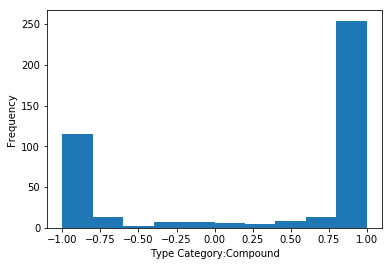

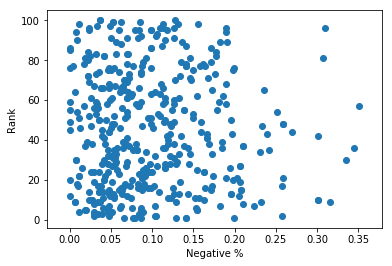

In [24]:
all_lyrics = df['lyrics']
comp = senti_metric(all_lyrics)

neg = neg_metric(all_lyrics)
pos = pos_metric(all_lyrics)

rank = df['rank']

plt.hist(comp)
plt.xlabel('Type Category:Compound')
plt.ylabel('Frequency')
plt.show()


plt.scatter(neg, rank)
plt.xlabel('Negative %')
plt.ylabel('Rank')
plt.show()


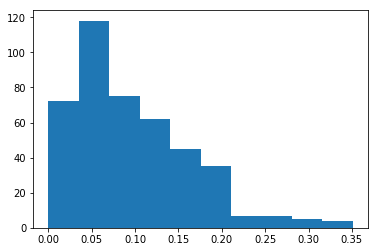

Text(0, 0.5, 'Rank')

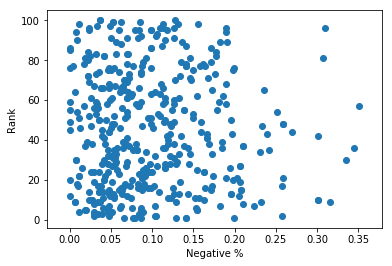

In [25]:
plt.hist(neg)
plt.show()

plt.scatter(neg, rank)
plt.xlabel('Negative %')
plt.ylabel('Rank')



In [26]:
import patsy
import statsmodels.api as sm

d = {'neg': neg, 'rank': rank}
df_test = pd.DataFrame(data = d )
df_test.corr()

outcome, predictors = patsy.dmatrices('rank ~ neg', df_test)
mod = sm.OLS(outcome, predictors)
type(mod)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3558
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.551
Time:                        20:41:35   Log-Likelihood:                -2054.5
No. Observations:                 430   AIC:                             4113.
Df Residuals:                     428   BIC:                             4121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.8860      2.426     18.914      0.0

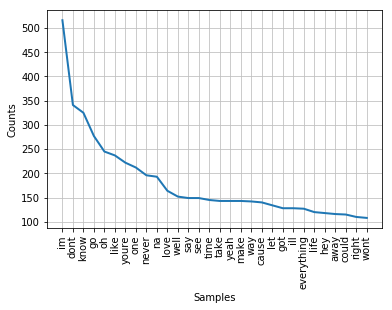

In [27]:
#Alt Rock 


df_rock = df.loc[df['genre'] == 'alt rock']
rock = df_rock['tokenized_lyrics'].apply(pd.Series).stack()
fdist_rock = FreqDist(rock)

for punc in string.punctuation:
    del fdist_rock[punc]

fdist_rock.plot(30, cumulative=False)


In [28]:
#list of the most common words 
a = fdist_rock.most_common(40)
dfr = pd.DataFrame(a, columns = ['Word', 'Count'])
word = dfr['Word']

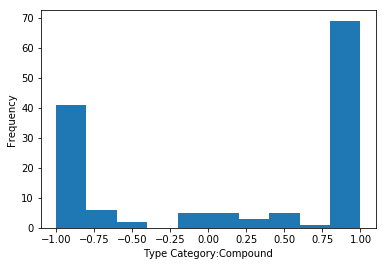

In [29]:
lyrics = df_rock['lyrics']
rank = df_rock['rank']
comp = senti_metric(lyrics)
neg = neg_metric(lyrics)
pos = pos_metric(lyrics)


plt.hist(comp)
plt.xlabel('Type Category:Compound')
plt.ylabel('Frequency')
plt.show()

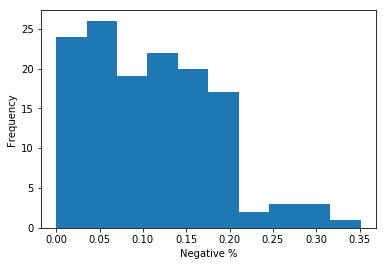

Text(0, 0.5, 'Rank')

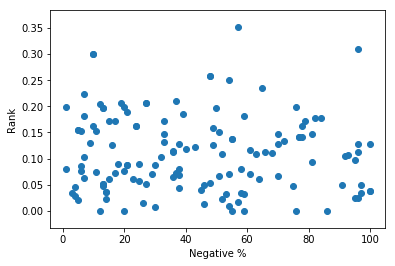

In [30]:
plt.hist(neg)
plt.xlabel('Negative %')
plt.ylabel('Frequency')
plt.show()

plt.scatter(rank, neg)
plt.xlabel('Negative %')
plt.ylabel('Rank')





In [31]:
d = {'neg': neg, 'rank': rank}
df_test = pd.DataFrame(data = d )
df_test.corr()

outcome, predictors = patsy.dmatrices('rank ~ neg', df_test)
mod = sm.OLS(outcome, predictors)
type(mod)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4774
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.491
Time:                        20:41:39   Log-Likelihood:                -655.35
No. Observations:                 137   AIC:                             1315.
Df Residuals:                     135   BIC:                             1321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.9157      4.496     10.212      0.0

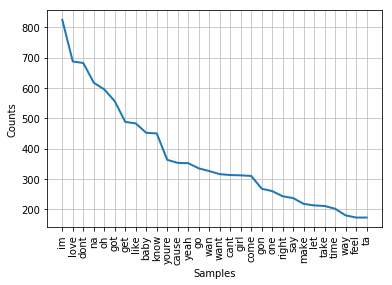

In [32]:
#Dance Genre
df_dance = df.loc[df['genre'] == 'dance']
dance = df_dance['tokenized_lyrics'].apply(pd.Series).stack()
fdist_dance = FreqDist(dance)

for punc in string.punctuation:
    del fdist_dance[punc]

fdist_dance.plot(30, cumulative=False)


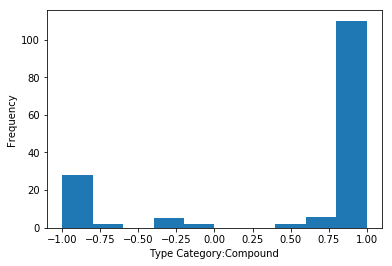

In [33]:
#Dance 
lyrics = df_dance['lyrics']
comp = senti_metric(lyrics)
rank = df_dance['rank']
neg = neg_metric(lyrics)
pos = pos_metric(lyrics)

plt.hist(comp)
plt.xlabel('Type Category:Compound')
plt.ylabel('Frequency')
plt.show()

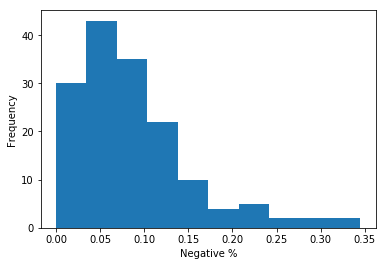

Text(0, 0.5, 'Rank')

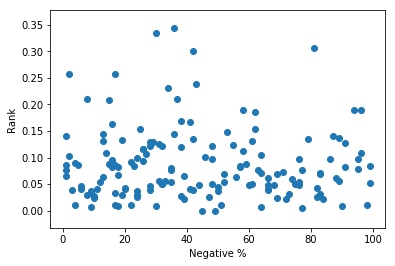

In [34]:
plt.hist(neg)
plt.xlabel('Negative %')
plt.ylabel('Frequency')
plt.show()

plt.scatter(rank, neg)
plt.xlabel('Negative %')
plt.ylabel('Rank')


In [35]:
d = {'neg': neg, 'rank': rank}
df_test = pd.DataFrame(data = d )
df_test.corr()

outcome, predictors = patsy.dmatrices('rank ~ neg', df_test)
mod = sm.OLS(outcome, predictors)
type(mod)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1731
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.678
Time:                        20:41:44   Log-Likelihood:                -736.46
No. Observations:                 155   AIC:                             1477.
Df Residuals:                     153   BIC:                             1483.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.2920      3.719     12.178      0.0

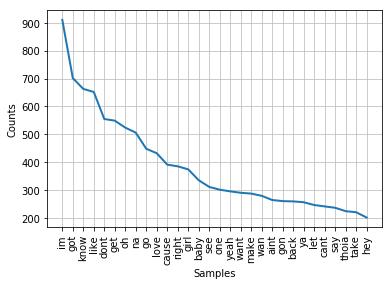

In [36]:
#Hiphop
df_hh = df.loc[df['genre'] == 'hiphop']

hiphop = df_hh['tokenized_lyrics'].apply(pd.Series).stack()
fdist_hh = FreqDist(hiphop)

for punc in string.punctuation:
    del fdist_hh[punc]

fdist_hh.plot(30, cumulative=False)

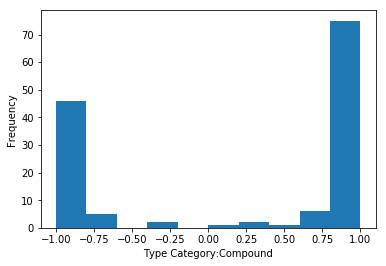

In [37]:
lyrics = df_hh['lyrics']
comp = senti_metric(lyrics)
rank = df_hh['rank']
neg = neg_metric(lyrics)
pos = pos_metric(lyrics)

plt.hist(comp)
plt.xlabel('Type Category:Compound')
plt.ylabel('Frequency')
plt.show()

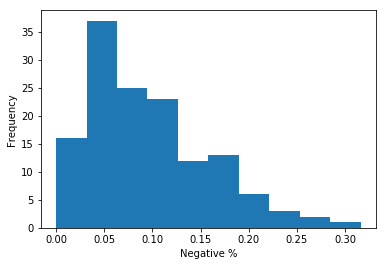

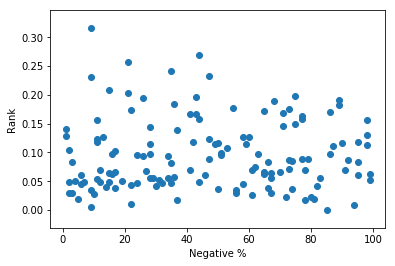

In [38]:
plt.hist(neg)
plt.xlabel('Negative %')
plt.ylabel('Frequency')
plt.show()

plt.scatter(rank, neg)
plt.xlabel('Negative %')
plt.ylabel('Rank')
plt.show()

In [39]:
d = {'neg': neg, 'rank': rank}
df_test = pd.DataFrame(data = d )
df_test.corr()

outcome, predictors = patsy.dmatrices('rank ~ neg', df_test)
mod = sm.OLS(outcome, predictors)
type(mod)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.04390
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.834
Time:                        20:41:50   Log-Likelihood:                -661.82
No. Observations:                 138   AIC:                             1328.
Df Residuals:                     136   BIC:                             1333.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.9566      4.645      9.894      0.0

In [40]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
import patsy
import numpy as np
from sklearn.linear_model import LinearRegression



In [41]:
#import matplotlib.pyplot as plt
#plt.plot(fdist_rock)
#plt.scatter(df_rock['year'], df_rock['rank'])
#plt.plot

# Ethics & Privacy

Ethical considerations regarding privacy/consent is not needed in this case since we are looking at published songs from artists that are released to the public. However, there could possibly be reputation or media backlash for artists who our data reports being homophobic. We are only analyzing the lyrics as data, and sometimes artists have a different meaning about their songs then what most people infer it as. 

Our focus will also be emphasized on songs interpreted in English, meaning not all artists' songs around the world will be analyzed. This may seem like only specific regions or genres will be targeted. On the other hand, our project may serve as an initiative to further analyze more genres or artists globally in order to see if the same results are produced.

Regarding data collection, there can be some bias since we used survey and data from the internet to get data of homophobic and misogynistic lyrics. There can be bias since some people might consider certain words to be homophobic or misogynistic and some people might not think that it is. In our Google survey, we tried to address this issue by also including the question if people identify as a member of the LGBTQ community. This bias can also appear in the list we collected from Wikipedia, since it's sourced from online and people can change the answers.

# Conclusion & Discussion

When our team thought about different ideas for our project and settled on homophobic slurs in popular songs, we expected that there would be a lot of homophobic slurs that occur in top 100 billlboard charts, and we could easily clean the data and analyze the results. However, after cleaning our data and looking at the results, we realized that very few songs had homophobic slurs, and that many of the results were also false positives. There isn’t enough data to answer our research question. Since we only used data from the top 100 billboard charts, unpopular songs might have had more homophobic slurs. 

After realizing that we did not have enough data for analysis on that subject, our team chose another route on this project to analyze. We decided to analyse the sentiment of the lyrics in relation to the genre. From our analysis, we found that Hip Hop is the most negative genre and that hip-hop also contained the most homophobic slurs.

We really did not anticipate that we would find so few songs with homophobic slurs. The lexicon that we used were from wikipedia and google surveys that we conducted. The wikipedia lists of slurs did contain some words that were international slurs so they might not have factored into the results very much. Additionally certain genres of music contain slang and context that is specific to the subculture that they are apart of. Our analysis was not able to address this fact. A much deeper dive into sentiment analysis with further contextualization would be necessary and might provide greater insight into homophobia in music.

Since we chose to analyze songs from 2000 to 2010 we are looking at a snapshot of popular culture nearly a decade ago. In society today homophobia is not tolerated. Artist, movie stars and other public figures alike are increasinly being scrutinized for their homophobic remarks of the past and are having to deal with the consequences of a much more open and accepting society.

# Appendix

### Part A - Code to build charts_with_lyrics_df

In [42]:
# Code to grab lyrics and build charts_with_lyrics.csv 

#chart_with_lyrics = year_end_hot100_df
#chart_with_lyrics.columns = ['year','rank','title', 'artist']


#Artist and song titles that needed to manually be fixed so script could find them.
#chart_with_lyrics.iat[92,2] = "Girl On TV"
#chart_with_lyrics.iat[123,3] = 'Christina Aguilera'
#chart_with_lyrics.iat[154,3] = 'Ricky Martin'
#chart_with_lyrics.iat[193,2] = 'So Fresh, So Clean'
#chart_with_lyrics.iat[197,3] = 'Nas'
#chart_with_lyrics.iat[248,2] = 'Lights, Camera, Action'
#chart_with_lyrics.iat[312,3] = 'Nelly'
#chart_with_lyrics.iat[321,3] = 'B2K'
#chart_with_lyrics.iat[325,2] = 'Where Is The Love?'
#chart_with_lyrics.iat[384,2] = "Can't Stop Won't Stop"
#chart_with_lyrics.iat[423,3] = 'Usher'
#chart_with_lyrics.iat[553,3] = 'Usher'
#chart_with_lyrics.iat[592,3] = 'Jay-Z And Linkin Park'
#chart_with_lyrics.iat[611,3] = 'Nelly'
#chart_with_lyrics.iat[761,3] = 'Beyoncé'
#chart_with_lyrics.iat[794,3] = 'Crime Mob'
#chart_with_lyrics.iat[805,3] = 'Jordin Sparks'
#chart_with_lyrics.iat[946,3] = 'Eminem'
#chart_with_lyrics.iat[1088,3] = 'Sean Kingston'
#chart_with_lyrics.iat[152,2] = "Superwoman, Part 2"
#chart_with_lyrics.iat[207,2] = "What's Luv?"
#chart_with_lyrics.iat[214,2] = "I Need A Girl, Part I"
#chart_with_lyrics.iat[261,2] = "Pass The Courvoisier Part II"
#chart_with_lyrics.iat[316,3] = "Busta Rhymes"
#chart_with_lyrics.iat[364,2] = "It's Five O'Clock Somewhere"
#chart_with_lyrics.iat[373,2] = "Hell Yeah / (In Those Jeans Interlude)"
#chart_with_lyrics.iat[524,3] = "Lil Jon & The East Side Boyz"
#chart_with_lyrics.iat[608,2] = "SexyBack"
#chart_with_lyrics.iat[608,3] = "Justin Timberlake"
#chart_with_lyrics.iat[636,2] = "Give It Up To Me"
#chart_with_lyrics.iat[640,2] = "I'm 'N Luv (Wit A Stripper)"
#chart_with_lyrics.iat[748,2] = "I'm A Flirt Remix"
#chart_with_lyrics.iat[762,2] = "SexyBack"
#chart_with_lyrics.iat[762,3] = "Justin Timberlake"
#chart_with_lyrics.iat[798,2] = "That's That"
#chart_with_lyrics.iat[985,2] = "How Do You Sleep?"
#chart_with_lyrics.iat[1004,2] = "OMG"
#chart_with_lyrics.iat[1004,3] = 'Usher'
#chart_with_lyrics.iat[1005,2] = "Airplanes"
#chart_with_lyrics.iat[1005,3] = "B.o.B"
#chart_with_lyrics.iat[1010,2] = "Nothin' On You"
#chart_with_lyrics.iat[1010,3] = "B.o.B"
#chart_with_lyrics.iat[1012,3] = 'Young Money'
#chart_with_lyrics.iat[1012,2] = "BedRock"
#chart_with_lyrics.iat[1021,2] = "DJ Got Us Fallin' in Love"

#Remove 'featuring' artists
#def remove_featuring(string):
    
#    artist = string.split('featuring')[0]   
#    return artist

#chart_with_lyrics["artist"] = chart_with_lyrics["artist"].apply(remove_featuring)



#def get_lyrics(row):
#    song_title = row['title']
#    artist = row['artist']
   
#    time.sleep(.5)
   
#    try:
#        lyrics = PyLyrics.getLyrics(song=song_title,singer=artist)
#    except:
#        lyrics = "NaN"
    
#    return lyrics

#chart_with_lyrics['lyrics'] = chart_with_lyrics.apply(get_lyrics, axis=1) 


# Manually add lyrics the script seem to be incapable of grabbing
#chart_with_lyrics.iat[1062,4] = "I got the magic in me Every time I touch that track it turns into gold Everybody knows I got the magic in me When I hit the floor the girls come snappin at me Now everybody wants some presto magic magic magic Magic magic magic Magic magic magic Ahooooooo I got the magic in me These tricks that Ill attempt will blow your mind mind Pick a verse any verse Ill hypnotize you with every line ah Ill need a volunteer how about you with the eyes? right there Come on down to the front and stand right here and dont be shy Bobby Ill have you time travellin have your mind babblin People tryin to inherit the skill so they askin me Even David Blaine had to go and take some classes and I see Mindfreak like Whats up man whats happenin? Mindfreak So come one come all and see the show tonight ha Prepare to be astounded no ghost or poltergeist You know Im no Pinocchio I never told a lie So call me Mr. Magic Man I float on Cloud 9 haha I got the magic in me I got the magic baby Every time I touch that track it turns into gold yes it turns to gold Everybody knows I got the magic in me I got the magic baby When I hit the floor the girls come snappin at me they be snappin baby Now everybody wants some presto magic magic magic Magic magic magic Magic magic magic Ahooooooo I got the magic in me Well take a journey into my mind mind youll see why its venom I rhyme Stay on the road so I call my mama when I got time I hit the stage go insane then jump into that crowd ah See see when I rhyme I flow on the beat like pitta-da-da See I deceive ya with my intergalactic ether yeah I sing just like Aretha so respect me like Im Caesar I kick it like Adidas flowin sticky like adhesive Be cautious cause what I be onll leave ya with amnesia I break all the rules like Evel Knievel yeah Its a spectacular show cause my heart pumps diesel So whatever you sayin it dont entertain my ego I do this everyday Hocus Pocus is my steelo I got the magic in me I got the magic baby [Every time I touch that track it turns into gold yes it turns to gold Everybody knows I got the magic in me I got the magic baby When I hit the floor the girls come snappin at me they be snappin baby Now everybody wants some presto magic magic magic Magic magic magic Magic magic magic Ahooooooo I got the magic in me"
#chart_with_lyrics.iat[207,4] = "Put the fuckin mic on Mic is on Joe Crack the Don uh Uh Irv Gotti Whats love Terror Terror Squad It should be about us be about trust Whats love Got to do got to do with it babe Whats love Its about us its about trust babe Whats love Got to do got to do with it babe Whats love It should be about us it should be about trust babe Whats love Yeah uh uh uh Woo Yeah slow down baby Let you know from the gate I dont go down lady I wanna chick with thick hips that licks her lips She can be the office type or like to strip Girl you get me aroused how you look in my eye But you talk too much man youre ruinin my high Dont wanna lose the feelin cause the roof is chillin Its on fire and you lookin good for the gettin Ima rider whether in a hoodie or a linen A provider you should see the jewelery on my women And Im livin it up the Squad stay fillin the truck With chicks thats willin to triz with us uh You say you gotta man and youre in love But whats love gotta do with a little menage After the par tay me and you Could just slide for a few and she could come too Thats love Whats love Got to do got to do with it babe Whats love Its about us its about trust babe Whats love Got to do got to do with it babe Whats love It should be about us it should be about trust babe Whats love Yeah uh yeah yo uh yo Mami I know you got issues you gotta man But you need to understand that you got somethin with you Ass is fat frame is little Tattoo on your chest with his name in the middle uh Im not a hater I just crush a lot And the way you shake your booty I dont want you to stop You need to come a little closer come a little closer And let me put you under my arms like a Don is supposed ta Please believe you leave with me We be freakin all night like we was on E You need to trust the God and jump in the car For a little heartache at the Taj Mahal Whats love Whats love Got to do got to do with it babe Whats love Its about us its about trust babe Whats love Got to do got to do with it babe Whats love It should be about us it should be about trust babe Whats love Yeah uh yo Yo I stroll in the club with my hat down Michael Jack style hot steppin who the mack now Not my fault cause they love the kid Might be the chain or the whip I dont know what it is We just party and bullshit cmon mami Put your body in motion you got a nigga open You came here with the heart to cheat So you need to sing the song with me All my ladies come on When I look in your eyes theres no stoppin me I want the Don Joey Crack on top of me uh huh Dont want your stacks just break my back yeah Gonna cut you no slack cause Im on it like that uh woo uh Come on yeah yeah yall And put it all yeah yeah yall on me put it on ya girl On me Ima put it on ya girl Whats love Got to do got to do with it babe Whats love Its about us its about trust babe Whats love Got to do got to do with it babe Whats love It should be about us it should be about trust babe Whats love Whats love Got to do got to do with it babe Whats love Its about us its about trust babe Whats love Got to do got to do with it babe Whats love It should be about us it should be about trust babe Whats love"
#chart_with_lyrics.iat[214,4] = "Yeah Yeah I need a I want a  Usher I need a girl to ride ride ride I need a girl to make my wife I need a girl whos mine oh mine I need a girl in my life   Yo Im internationally known on the microphone I got it all but I really need a wife at home I dont really like the zone never spend the night alone I got a few you would like to bone But chicks dont romance me dont tickle my fancy Only Tiffany Nancy thats not what my plans be I need a girl that could stand me raise me a family Go to trips at the Lancy trip to the Grammys cause Most of these girls be confusin me I dont know if they really love me or they usin me Heres the money or maybe you aint used to me Cause you was depressed and now you abusin me Thats why I need a girl that be true to me Know bout the game and know how to do to me Without a girl on my side shit I ruin me Forget the word its just you and me   Now lets ride   I need a girl to ride ride ride I need a girl to make my wife I need a girl whos mine oh mine I need a girl in my life I need a girl to ride ride ride I need a girl to be my wife Nobody else cause shes all mine I need a girl in my life  Yo now I have had a lot of women in my lifetime But see its not a lot of women that got the right mind I done had pretty chicks with all the right features And hoodrat chicks that only rock sneakers Cellphones and beepers and know how to treat ya You break her heart shell walk out and leave ya I find a girl Ima keep her Cause now Im gettin money and the game gettin deeper I want some real shit I need somebody I can chill with I need somebody I can build with I need somebody I can hold tight With the time and no full limits no right Anytime we together would feel so right You the girl I been lookin for my whole life God bless me Im glad I got the insight Its cause of you girl now I understand life I need a girl   I need a girl to ride ride ride I need a girl to make my wife I need a girl whos mine oh mine I need a girl in my life I need a girl to ride ride ride I need a girl to be my wife Nobody else cause shes all mine I need a girl in my life   I had a girl that wouldve died for me Didnt preciate her so I made her cry for me Every night she had tears in her eyes for me Quarter Ks shorty took the whole ride for me First we were friends then became lovers You was more than my girl we was like brothers All night we would play fight under covers Now you gone cant love you like I really wanna But every time I think about your pretty smile And how we used to drive the whole city wild Damn I wish you wouldve had my child A pretty little girl wit Diddys smile This shit is wild All dem days that I reminisce About the way I use to kiss dem pretty lips But as long as you happy Ima tell you this I love you girl and youre the one that I will always miss I love you yeah   I need a girl to ride ride ride I need a girl to make my wife I need a girl whos mine oh mine I need a girl in my life I need a girl to ride ride ride I need a girl to be my wife Nobody else cause shes all mine I need a girl in my life I need a girl to ride ride ride I need a girl to make my wife I need a girl whos mine oh mine I need a girl in my life I need a girl to ride ride ride I need a girl to be my wife Nobody else cause shes all mine I need a girl in my life I need a girl to ride ride ride I need a girl to make my wife I need a girl whos mine oh mine I need a girl in my life I need a girl to ride ride ride I need a girl to be my wife Nobody else cause shes all mine I need a girl in my life"
#chart_with_lyrics.iat[261,4] = "Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna   Act a fool you better watch out uh huh Hot shit be bringin the cops out cmon Street niggaz is ringin them shots out   Short circuit and blacken the blocks out Now open up the garage and pull the drops out Rockin the fur coat bringin the blue fox out   Diamonds light up the block runnin the blue rocks out uh Whylin till all of my crew knocks out cmon   Get yo ass up on the floor   Huh throw ya hands if you want some more ho   Baby wiggle your crotch out huh And peep the way we be blowin them spots out   Cmon look how we got em ready to act out Girl Im ready to give it twistin your back out lets go   Drink yack till a nigga fallin out   Flat on his back now watch a nigga crawlin out talk to me   I said Busta whassup son You leave them girl rollin and it look like cmon They asses is swollen and they ass gettin big now But if your man babysittin uh huh then what you gon say What we gon tell em man We gon tell that brotha Pass the Courvoisier We gon tell that brotha Pass the Courvoisier Everybody sing it now Pass the Courvoisier Everybody sing it now Pass the Courvoisier Everybody sing it now Pass the Courvoisier Waah ooh oh   Girl you need to shake it off   Too much hair on your cho cha   Then shave it off   Cmon jump smack yo ass and break it off   And if its too hot for yall   You need to take it off thats right   In case you aint knowin niggaz we on a roll now   Diddy like we done stumbled on a pot of gold now cmon Food spillin all out yeah of the bowl now huh Money thick get harder to fold now cmon   Ladies tell me if youre feelin all right   And are you sure that you up for doin it all night   I like this   Listen before you ass bet nigga We wreck shit and we aint even blacked yet cmon   People all around and police rapidly shut down the block   And the club aint even packed yet cmon Nuff drinkin at the bar hold it down whylin out Till the club is closed down talk to me   I said Busta whassup son You leave them girl rollin and it look like cmon They asses is swollen and they ass gettin big now But if your man babysittin uh huh then what you gon say What we gon tell em man We gon tell that brotha Pass the Courvoisier We gon tell that brotha Pass the Courvoisier Everybody sing it now Pass the Courvoisier Everybody sing it now Pass the Courvoisier Waah ooh oh   Jump jump Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna   Rob a bank my nigga cash rule   Bust it lets get this money and act like a damn fool   Fuck it act stupid and jump in the damn pool huh   Bone bitches and me and they mans cool   Cmon shit Im sayin just put your bank up nigga Put me and Diddy together you bankrupt cmon   Fly niggaz we full of finesse yall yeah   Me and my niggaz is fittin to bless yall   cmon Dont talk about it be about it SHUT UP Live niggaz come and be around it WHATTUP CMON rep to the fullest now huh These niggaz aint knowin how we gon put it down   cmon Cock aim and shoot   To spray it down   Steamrollin you niggaz   And lay it down   Niggaz frontin with they thug image   But we pay them no mind   Now drink until the bottle finished talk to me   I said Busta whassup son You leave them girl rollin and it look like cmonn They asses is swollen and they ass gettin big now But if your man babysittin uh huh then what you gon say What we gon tell em man We gon tell that brotha Pass the Courvoisier We gon tell that brotha Pass the Courvoisier Everybody sing it now Pass the Courvoisier Everybody sing it now Pass the Courvoisier Waah ooh oh   Jump jump Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna JUMP JUMP Dont this hit make my people wanna"
#chart_with_lyrics.iat[364,4] = "Alan The sun is hot and that old clock is movin slow And so am I Workday passes like molasses in wintertime But its July Gettin paid by the hour and older by the minute My boss just pushed me over the limit Id like to call him somethin I think Ill just call it a day  Pour me something tall and strong Make it a Hurricane before I go insane Its only half past twelve but I dont care Its five oclock somewhere  Well this lunch break is gonna take all afternoon Half the night Tomorrow mornin I know therell be hell to pay Hey but thats alright I aint had a day off now in over a year My Jamaican vacations gonna start right here If the phones for me You can tell em I just sailed away  And pour me something tall and strong Make it a Hurricane before I go insane Its only half past twelve but I dont care Its five oclock somewhere  I could pay off my tab Pour myself in a cab And be back to work before two At a moment like this I cant help but wonder: What would Jimmy Buffett do  Jimmy Buffett Funny you should ask Alan Jimmy  Id say Pour me something tall and strong Make it a Hurricane before I go insane Its only half past twelve but I dont care   Pour me something tall and strong Make it a Hurricane before I go insane Its only half past twelve but I dont care Alan Jackson He dont care  I dont care Its five oclock somewhere     What time zone am I on What country am I in It doesnt matter its five oclock somewhere  Its always on five in Margaritaville come to think of it I heard that  Youve been there havent you Yes sir  Ive seen your boat there Ive been to Margaritaville a few times  Alright well thats good Stumbled my way back  Okay we just want to make sure you can keep it between the navigational beacons Between the buoys I got it  Alright well its five oclock lets go somewhere Im ready crank it up  Lets get out of here Im gone"
#chart_with_lyrics.iat[640,4] = "Goddamn Lil Mama You know you thick as hell you know what Im sayin Matter fact After the club you know what Im talkin bout Me and my niggas gone be together you know what Im sayin I aint gon worry bout them really though Im just lookin at you Yeah you know You got them big ass hips god damn  Got the body of a goddess Got eyes butter pecan brown I see you girl Droppin low She comin down from the ceiling To the floor Yeah she know what she doin Yeah yeah yeah She doin that right thing Yeah yeah yeah yeah ea I need to get her over to my crib and do that night thing Cause Im N luv wit a stripper  She poppin she rollin she rollin She climbin that pole and Im N luv wit a stripper She trippin she playin she playin Im not goin nowhere girl Im stayin Im N luv wit a stripper  She poppin she rollin she rollin She climbin that pole and Im N luv wit a stripper She trippin she playin she playin Im not goin nowhere girl Im stayin Im N luv wit a stripper  Out of all the girls she be the hottest Liking the way she break it down I see you girl Spinnin wide And she lookin at me Right in my eyes Yeah she got my attention Yeah yeah yeah Did I forget to mention I need to get her over to my crib and do that night thing Cause Im N luv wit a stripper  Shes every mans dream Shes Gods gift to Earth Women they love em too Thats what you call a womens worth See I love all the strippers Because they show me love They know I never pay as free whenever I hit the club But I cant even lie The girls are here so fly She slidin up and down that pole got me mesmerized Mike Jones dont ever trick But god damn she thick I cant lie I must admit Im N luv wit a stripper  She poppin she rollin she rollin She climbin that pole and Im N luv wit a stripper She trippin she playin she playin Im not goin nowhere girl Im stayin Im N luv wit a stripper  She poppin she rollin she rollin She climbin that pole and Im N luv wit a stripper She trippin she playin she playin Im not goin nowhere girl Im stayin Im N luv wit a stripper  She can pop it she can lock it Teddy Penderass down Im bout to see this sexy girl In my bed She dont know what she is doin To my head Yeah she turnin tricks on me Yeah yeah yeah She dont even know me Yeah yeah yeah ea Id have got her over to my crib to do that night thing Cause Im N luv wit a stripper  She poppin she rollin she rollin She climbin that pole and Im N luv wit a stripper She trippin she playin she playin Im not goin nowhere girl Im stayin Im N luv wit a stripper  She poppin she rollin she rollin She climbin that pole and Im N luv wit a stripper She trippin she playin she playin Im not goin nowhere girl Im stayin Im N luv wit a stripper  She poppin she rollin she rollin She climbin that pole and Im N luv wit a stripper She trippin she playin she playin Im not goin nowhere girl Im stayin Im N luv wit a stripper  She poppin she rollin she rollin She climbin that pole and Im N luv wit a stripper She trippin she playin she playin Im not goin nowhere girl Im stayin Im N luv wit a stripper"
#chart_with_lyrics.iat[798,4] = "I pull up whip low in the Phantom With the wheels spinnin Ladies like Thats that shit Im in the back of the club Blowin trees Hands up head bobbin like Thats that shit In the spot where the girls go wild Dancing tittie bar style Im like Thats that shit Snoop Dizzle hey Your boy Kells hey Let me hear you say Thats that shit Lets get this party jumpin Me and Kell gon get it bumpin They humpin Like when its over We gone all get into somethin The Dog is fresh Southside without a vest Nothin on my chest But these ladies up out the midwest I must confess That in the Chi is so blessed Leaving nothing on my mind But Doggy you and safe sex This aint a test You fucking with a cold mess Meet me in Chicago Let me get you to this real west Its real strong Real fat and real long Doggys in the building Holdin something they can feel up on And once they get it Something they can build up on Take that skinny nigga home Work that feeling till its gone Get that home grown Put that shit on daddy long I know how you ladies do it T shirt with no panties on Lets get this shit crackin Kell and Doggy Dogg in action If you in here all alone You might get this dog bone I pull up whip low in the Phantom With the wheels spinnin Ladies like Thats that shit Im in the back of the club Blowin trees Hands up head bobbin like Thats that shit In the spot where the girls go wild Dancing tittie bar style Im like Thats that shit Snoop Dizzle hey Your boy Kells hey Let me hear you say Thats that shit Dippin low six four Hundred spokes and chronic smoke All these ladies on the floor Cause they know what we in here for Dogg and Kelly came to ball Get your ass up off the wall Let that middle wiggle Now make that shit fall Not just one but all yall Move it like you want it all Let me see you bounce it for me Work that shit for Doggy Dogg You gots to do it Is that your crew Bring em too Come here let me take you through it Then once Kelly get into it We can get this after party Poppin everybody Got themselves another body Knockin out Without protection though Thats my confession But at the spot If you just think Your gonna listen You can drop it like its hot Hold up I came to cool out Lay back and get blown Maybe Henny maybe gin A couple shots of Patron And if you didnt you missed it But now its known That this cash shit Kells sing that song I pull up whip low in the Phantom With the wheels spinnin Ladies like Thats that shit Im in the back of the club Blowin trees Hands up head bobbin like Thats that shit In the spot where the girls go wild Dancing tittie bar style Im like Thats that shit Snoop Dizzle hey Your boy Kells hey Let me hear you say Thats that shit So if you think you got the bomb shit Holla at a playa Holla at a playa Holla at a playa And if you lookin for some good sex Holla at a playa Holla at a playa Holla at a playa Girl if you ever in the 3 1 2 Holla at a playa Holla at a playa Holla at a playa And if youre ever in the 2 1 3 Holla at a playa Holla at a playa Holla at a playa I pull up whip low in the Phantom With the wheels spinnin Ladies like Thats that shit Im in the back of the club Blowin trees Hands up head bobbin like Thats that shit In the spot where the girls go wild Dancing tittie bar style Im like Thats that shit Snoop Dizzle hey Your boy Kells hey Let me hear you say Thats that shit"
#chart_with_lyrics.iat[1021,4] = "Usher yeah man  So we back in the club With our bodies rockin from side to side Side side to side Thank God the week is done I feel like a zombie gone back to life Back back to life Hands up and suddenly we all got our hands up No control of my body Aint I seen you before I think I remember those eyes eyes eyes Eyes eyes eyes  Cause baby tonight The DJ got us fallin in love again Yeah baby tonight The DJ got us fallin in love again So dance dance like its the last Last night of your life life Gonna get you right Cause baby tonight The DJ got us fallin in love again  Keep downin drinks like theres no tomorrow Theres just right now now now Now now now now Gon set the roof on fire Gonna burn this mutha down down down Down down down down Come on Hands up when the music drops We both put our hands up Put your hands on my body Swear I seen you before I think I remember those eyes eyes eyes Eyes eyes eyes  Cause baby tonight The DJ got us fallin in love again Yeah baby tonight The DJ got us fallin in love again love again So dance dance like its the last Last night of your life life Gon get you right Cause baby tonight The DJ got us fallin in love again  Usher dont lie Hear no evil or speak no evil or see no evil Get it baby hope you catch it like TO thats how we roll My life is a movie and you just Tivo  Miami got me swishin like a dreadlock She dont wrestle but I got her in a headlock Yabba dabba doo make her bed rock Miami on fire pss red hot  Bada bing bada boom Mr Worldwide as I step in the room Im a hustler baby but that you knew And tonight its just me and you dale  Cause baby tonight The DJ got us fallin in love again Mr Worldwide yeah lets take over the world Yeah baby tonight yeah man The DJ got us fallin in love let go dale Fallin in love oh whoa So dance dance like its the last Last night of your life life Gonna get you right  Cause baby tonight cmon cmon The DJ got us fallin in love again Yeah baby tonight The DJ got us fallin in love again So dance dance like its the last Last night of your life life Gonna get you right Cause baby tonight The DJ got us fallin in love again love again  Yeah thank you DJ"
#chart_with_lyrics.iat[985,4] = "Oh oh oh oh Oh oh oh oh Oh oh oh oh Oh oh oh oh  Its been about a year now aint seen or heard from you I been missin you crazy how do you how do you sleep I found the letter you wrote me it still smells just like you Damn those sweet memories How do you how do you sleep how do you sleep  I tried my best at movin on have yet to find a girl like you See things now I didnt before now wishin I had more time with you How do you stay awake knowin all I do is think of you All the things we thought about then never will happen again If I could just see you  If I had my way Ill come and getcha girl In your favorite car with the missing top Remember round my way where we used to park And did all those things to steal your heart  Its been about a year now aint seen or heard from you I been missin you crazy how do you how do you sleep I found the letter you wrote me it still smells just like you Damn those sweet memories How do you how do you sleep  Its been about a year now aint seen or heard from you I been missin you crazy how do you how do you sleep I found the letter you wrote me it still smells just like you Damn those sweet memories How do you how do you sleep how do you sleep  Baby all that I hear from my friends again again and again They come and ask about you they say We saw your girl at the game And damn we gotta say a big mistake by you Not only does your body bang but I miss the conversation too Tell me that you couldnt go to sleep cant think cant eat Till I come see you  If I had my way Ill come and getcha girl In your favorite car with the missing top Remember round my way where we used to park And did all those things to steal your heart  Its been about a year now aint seen or heard from you I been missin you crazy how do you how do you sleep I found the letter you wrote me it still smells just like you Damn those sweet memories How do you how do you sleep how do you sleep  Look Now its been about a year And Im tryin to figure out how could ya Forget about who loves you the most why would ya  Heal my heart heal my brain and Oh how I wish you could feel my pain Cause I couldnt get you off my mind if I tried  Twenty four seven three six five And my nights so cold days so long They say you dont know what you got till its gone  Well its gone and Im trippin how much I miss it And you steady walkin round like I never existed And its hard to understand you got another plan Tryin to play hard that you got another man  But youll never find another like moi Thatll ridin you round in a drop top car Baby youre a star and its time that you know it So much love and its time that we sow it  LUDA  Its been about a year now aint seen or heard from you I been missin you crazy how do you how do you sleep I found the letter you wrote me it still smells just like you Damn those sweet memories How do you how do you sleep how do you sleep  Its been about a year now aint seen or heard from you I been missin you crazy how do you how do you sleep I found the letter you wrote me it still smells just like you Damn those sweet memories How do you how do you sleep how do you sleep"

#chart_with_lyrics.iat[2,4] = "[Intro: Wyclef Jean] Ladies and gents, turn up your sound systems to the sound of Carlos Santana and the G&B, its The Product of get-away blues from the refugee camp  [Chorus: David McRae] Oh Maria Maria She reminds me of a west side story Growing up in Spanish Harlem Shes living the life just like a movie star Oh Maria Maria She fell in love in East L.A To the sounds of the guitar, yeah, yeah Played by Carlos Santana  [Guitar Solo: Carlos Santana]  [Verse 1: David McRae] Stop the looting, stop the shooting Pick pocking on the corner See as the rich is getting richer The poor is getting poorer Se mira Maria on the corner Thinking of ways to make it better In my mailbox theres an eviction letter Signed by the judge said see you later  [Bridge: Santana + (Wyclef Jean)] Ahora vengo mama chula mama chula Ahora vengo mama chula (East Coast) Ahora vengo mama chula mama chula Ahora vengo mama chula (West Coast)  [Chorus: David McRae] Oh Maria Maria She reminds me of a west side story Growing up in Spanish Harlem Shes living the life just like a movie star Oh Maria Maria She fell in love in East L.A To the sounds of the guitar, yeah, yeah Played by Carlos Santana  [Guitar Solo: Carlos Santana]  [Verse 2: David McRae] I said a la favella los colores The streets are getting hotter There is no water to put out the fire Ni gota de esperanza Se mira Maria on the corner Thinking of ways to make it better Then I looked up in the sky Hoping of days of paradise  [Bridge: Santana] Ahora vengo mama chula mama chula Ahora vengo mama chula (North side) Ahora vengo mama chula mama chula Ahora vengo mama chula (South side) Ahora vengo mama chula mama chula Ahora vengo mama chula (worldwide) Ahora vengo mama chula mama chula Ahora vengo mama chula (open up your eyes)  [Verse 3: David McRae] Maria you know youre my lover When the wind blows I can feel you Through the weather and even when were apart It feels like were together  [Chorus: David McRae] Maria, yeah She reminds me of a west side story Growing up in Spanish Harlem Shes living the life just like a movie star Oh Maria Maria She fell in love in East L.A To the sounds of the guitar, yeah, yeah Played by Carlos Santana  [Guitar Solo: Carlos Santana]  [Outro: Wyclef] Put em up, yall Carlos Santana with the Refugee Camp Wyclef Jerry Wonda Mr. Santana G&B Yo Carlos, man, youre making that guitar cry"
#chart_with_lyrics.iat[25,4] = "[Verse 1] Games, changes and fears When will they go from here? When will they stop? I believe that fate has brought us here And we should be together, babe But were not  [Pre-Chorus] I play it off, but Im dreaming of you And Ill keep my cool, but Im feigning  [Chorus] I try to say goodbye and I choke I try to walk away and I stumble Though I try to hide it, its clear My world crumbles when you are not near Goodbye and I choke I try to walk away and I stumble Though I try to hide it, its clear My world crumbles when you are not near  [Verse 2] I may appear to be free But Im just a prisoner of your love And I may seem alright and smile when you leave But my smiles are just a front Just a front, hey  [Pre-Chorus] I play it off, but Im dreaming of you And Ill keep my cool, but Im feigning  [Chorus] I try to say goodbye and I choke (Yeah) I try to walk away and I stumble Though I try to hide it, its clear My world crumbles when you are not near Goodbye and I choke (Yeah) I try to walk away and I stumble Though I try to hide it, its clear My world crumbles when you are not near  [Bridge] Here is my confession May I be your possession? Boy, I need your touch Your love, kisses, and such With all my might, I try But this I cant deny Deny  [Pre-Chorus] I play it off, but Im dreaming of you (But Im dreaming of you, babe) Ill keep my cool, but Im feigning  [Chorus] I try to say goodbye and I choke (Yeah) I try to walk away and I stumble Though I try to hide, it its clear My world crumbles when you are not near Goodbye and I choke (Yeah, yeah, yeah) I try to walk away and I stumble (Yeah, yeah, yeah) Though I try to hide, it its clear My world crumbles when you are not near (Your love kisses and such) Goodbye and I choke (Goodbye and I choke, yeah) I try to walk away and I stumble Though I try to hide it, its clear My world crumbles when you are not near  [Outro] Yeah, yeah, yeah Yeah, yeah"
#chart_with_lyrics.iat[161,4] = "[Verse 1] I dont understand You look just like the man In the picture by our bed The suspence is pounding and clouding up my head Im checkin your clothes And you wear the same size shoes You sleep in his spot And youre driving his car But I dont know just who you are  [Chorus 1] Theres a stranger in my house It took a while to figure out Theres no way you could be who you say you are You gotta be someone else Cuz he wouldnt touch me like that And he wouldnt treat me like you do He would adore me, he wouldnt ignore me So Im convinced theres a stranger in my house  [Verse 2] Im not sure who you are Dont see your shadow around when you walk You leave with no kisses Goodbye with no words If these walls could talk They would have nothing to tell  So what could it be? Is there someone immitating me? Could she be taking my place? Look me in the face And tell me that Im wrong When I say  [Chorus 2] Theres a stranger in my house (Theres a stranger in my house) It took a while to figure out (It took a while to figure out) Theres no way you could be who you say you are (Ooooh) You gotta be someone else Cuz he wouldnt touch me like that (Touch me like that) And he wouldnt treat me like you do (Treat me like you do) He would adore me, he wouldnt ignore me (Ooooh) So Im convinced theres a stranger in my house (Stranger in my house)  [Bridge] Pop quiz Tell me where we first kissed Tell me where my spot is Tell me if I liked it, loved it Or could it be That the stranger is me Have I changed so drastically? Is it I want more for me? And you remain the same  [Chorus 3] (Theres a stranger in my house) (It took a while to figure out) It took a while to figure out Theres no way you could be who you say you are (Ooooh) You gotta be someone else Cuz he wouldnt touch me like that (Touch me like that) And he wouldnt treat me like you do (Treat me like you do) He would adore me, he wouldnt ignore me (Ooooh) So Im convinced theres a stranger in my house (Stranger in my house) Woo! (Theres a stranger in my house) (It took a while to figure out) It took a while to figure out Theres no way you could be who you say you are (Ooooh) You gotta be someone else Cuz he wouldnt touch me like that (Touch me like that) And he wouldnt treat me like you do (Treat me like you do) He would adore me, he wouldnt ignore me (Ooooh) So Im convinced theres a stranger in my house (Stranger in my house)"
#chart_with_lyrics.iat[310,4] = "[Hook] 3, 6, 9 - damn she fine Hoping she can sock it to me one more time Get low, get low, get low get low! To the window, to the wall! Til the sweat drop down my balls Til all these bitches crawl Til all skeet skeet motherfuckers, all skeet skeet god damn! Til all skeet skeet motherfuckers, all skeet skeet god damn!  [Verse 1] Shorty crunk - so fresh, so clean Can she fuck? That question been harassing me In the mind. This bitch is fine! I done came to the club about 50 11 times Now can I play with your panty line? The club owner said I need to calm down Security guard go to sweating me now Nigga drunker than a motherfucker, threaten me now She getting crunk in the club, I mean she work it And I like to see the females twerking Taking the clothes off - buckey naked ATL - ho, dont disrespect it P-pop your pussy like this Cause Yin Yang Twins in this B-I-itch Lil Jon and the East Side Boys with me And we all like to see ass and titties Now bring your ass over here, ho And let me see you get low if you want this thug Now take it to the floor - and if your ass want to act You can keep your ass where youre at  [Hook] 3, 6, 9 - damn she fine Hoping she can sock it to me one more time Get low, get low, get low get low! To the window, to the wall! Til the sweat drop down my balls Til all these bitches crawl Til all skeet skeet motherfuckers, all skeet skeet god damn! Til all skeet skeet motherfuckers, all skeet skeet god damn!  [Verse 2 - Lil Jon] Let me see you get low (You scared!) Drop that ass to the floor (You scared!) Drop that ass yea, shake it fast yea Pop that ass to the left and the right yea Now back, back, back it up Now stop (oh!) then wiggle with it (yea!)  [Hook] 3, 6, 9 - damn she fine Hoping she can sock it to me one more time Get low, get low, get low get low! To the window, to the wall! Til the sweat drop down my balls Til all these bitches crawl Til all skeet skeet motherfuckers, all skeet skeet god damn! Til all skeet skeet motherfuckers, all skeet skeet god damn!  [Verse 3] Now give me my dub back and go get your friend Stupid bitch standing there while Im drinking my Hen Steady looking at me still asking questions Times up - nigga, pass me another contestant Ho move to the left if you aint bout 50 Done talked through 3 or 4 songs already Looking at a nigga with your palm out Bitch, I aint even seen you dance! Twerk something baby, work something baby Pop your pussy on the pole, do your thang baby Slide down that bitch a little bit then stop Get back on the floor, catch your balance then drop Now bring it back up, clap your ass like hands I just wanna see your ass dirty dance Yin Yang we done done again And put it on the map like hah?!  [Outro] Yall twerking a little bit ladies But you got to twerk a little bit harder than that Right now, I need all the ladies that know they look good tonight We want yall to do this shit like this: Bend over to the front, touch your toes! Back that ass up and down and get low Bend over to the front, touch your toes! Back that ass up and down and get low"
#chart_with_lyrics.iat[367,4] = "[Intro] Ooh, yeah Woo, yeah Yeah oh yeah  [Verse 1] The only ground I ever owned was stickin to my shoes Now I look at my front porch at this panoramic view I can sit and watch the fields fill up with rays of golden sun Or watch the moon lay on the fences like thats where it was hung  [Pre-Chorus] My blessings arent in front of me Its not about the land Ill never beat the view Of my front porch looking in  [Chorus] Theres a carrot top who can barely walk With a sippy cup of milk A little blue eyed blonde with shoes on wrong Cause she likes to dress herself And the most beautiful girl Holding both of them Yeah, the view I love the most Is my front porch looking in  [Verse 2] Ive traveled here and everywhere following my job Ive seen the paintings from the air brushed by the hand of God The mountains and the canyons reach from sea to shining sea But I cant wait to get back home to the one He made for me  [Pre-Chorus] Cause anywhere Ill ever go And everywhere Ive been Nothing takes my breath away Like my front porch looking in  [Chorus] Theres a carrot top who can barely walk With a sippy cup of milk A little blue eyed blonde with shoes on wrong Cause she likes to dress herself And the most beautiful girl Holding both of them Yeah, the view I love the most Is my front porch looking in  [Bridge] Ive seen what beautiful is about When Im looking in Not when Im looking out  [Chorus] Theres a carrot top who can barely walk With a sippy cup of milk A little blue eyed blonde with shoes on wrong Cause she likes to dress herself And the most beautiful girl Holding both of them Yeah, the view I love the most Oh, the view I love the most Is my front porch looking in, yeah  Oh, theres a carrot top who can barely walk (From my front porch looking in) A little blue eyed blonde with shoes on wrong, yeah And the most beautiful girl holding both of them, oh, yeah (Beautiful girl) (From my front porch looking in)"
#chart_with_lyrics.iat[395,4] = "[Verse 1] On a cobweb afternoon in a room full of emptiness By a freeway, I confess I was lost in the pages Of a book full of death, reading how well die alone And if were good, well lay to rest anywhere we want to go  [Chorus] In your house, I long to be Room by room, patiently Ill wait for you there, like a stone Ill wait for you there, alone  [Verse 2] And on my deathbed, I will pray to the gods and the angels Like a pagan to anyone who will take me to heaven To a place I recall, I was there so long ago The sky was bruised, the wine was bled, and there you led me on  [Chorus] In your house, I long to be Room by room, patiently Ill wait for you there, like a stone Ill wait for you there, alone, alone  [Bridge] And on I read, until the day was gone And I sat in regret of all the things Ive done For all that Ive blessed, and all that Ive wronged In dreams until my death, I will wander on  [Chorus] In your house, I long to be Room by room, patiently Ill wait for you there, like a stone Ill wait for you there, alone, alone"
#chart_with_lyrics.iat[460,4] = "[Music Video] [Produced by Kanye West]  [Intro] Yo, Gee, they cant stop me from rappin, can they? Can they, Hop?  [Chorus: Chaka Khan] Through the fire, to the limit, to the wall For a chance to be with you, Id gladly risk it all Through the fire, through whatever, come what may For a chance at loving you, Id take it all the way Right down to the wire, even through the fire  [Over Chorus] I spit it through the wire, man Theres too much stuff on my heart right now, man Id gladly risk it all right now Its a life-or-death situation, man Yall, yall dont really understand how I feel right now, man Its your boy, Kanye to the… Chi-Town, whats goin on?  [Verse 1] I drink a Boost for breakfast, an Ensure for dessert Somebody ordered pancakes, I just sip the sizzurp That right there could drive a sane man berserk Not to worry, Mr. H-to-the-Izzos back to wizzerk How do you console my mom or give her light support Tellin her her sons on life support? And just imagine how my girl feel On the plane scared as hell that her guy look like Emmett Till She was with me before the deal, shed been tryna be mine She a Delta, so shed been throwin that Dynasty sign No use in me tryna be lyin, I been tryna be signed Tryin to be a millionaire, how I used two lifelines In the same hospital where Biggie Smalls died The doctor said I had blood clots, but I aint Jamaican, man Story on MTV and I aint tryna make a band I swear, this right here, history in the makin, man  [Chorus: Chaka Khan] Through the fire, to the limit, to the wall For a chance to be with you, Id gladly risk it all Through the fire, through whatever, come what may For a chance at loving you, Id take it all the way Right down to the wire, even through the fire  [Over Chorus] I really apologize for everything right now If its unclear at all, man They got my mouth wired shut For like… I dunno, the doctor said like six weeks Yknow, he had, I had reconstructive surgery on my jaw I looked in the mirror And half my jaw was in the back of my mouth, man I couldnt believe it But Im still here for yall right now, man This what I got to say right here, dawg Yeah, turn me up, yeah, uh  [Verse 2] What if somebody from the Chi that was ill got a deal On the hottest rap label around? But he wasnt talkin bout coke and birds It was more like spoken word, cept hes really puttin it down? And he explained the story bout how Blacks came from glory And what we need to do in the game Good dude, bad night, right place, wrong time In the blink of a eye, his whole life changed If you could feel how my face felt You would know how Mase felt (Mason Betha!) Thank God I aint too cool for the safe belt I swear to God, driver two wanna sue I got a lawyer for the case, to keep whats in my safe safe My dawgs couldnt tell if I… I looked like Tom Cruise in Vanilla Sky, it was televised Theres been an accident like GEICO They thought I was burnt up like Pepsi did Michael I must got a angel, ‘cause look how death missed his ass Unbreakable, what, you thought theyd call me Mr. Glass? Look back on my life like the Ghost of Christmas Past Toys R Us where I used to spend that Christmas cash And I still wont grow up, Im a grown-ass kid Swear I should be locked up for stupid shit that I did But Im a champion, so I turned tragedy to triumph Make music thats fire, spit my soul through the wire  [Chorus: Chaka Khan] Through the fire, to the limit, to the wall For a chance to be with you, Id gladly risk it all Through the fire, through whatever, come what may For a chance at loving you, Id take it all the way Right down to the wire, even through the fire  [Outro Over Chorus] Yknow what Im sayin? When the doctor told me I had, um That I was gonna have to have a plate in my chin, I said Dawg, dont you realize Ill never make it on a plane now? Its bad enough I got all this jewelry on! You cant be serious, man"
#chart_with_lyrics.iat[469,4] = "[Hook] 3, 6, 9 - damn she fine Hoping she can sock it to me one more time Get low, get low, get low get low! To the window, to the wall! Til the sweat drop down my balls Til all these bitches crawl Til all skeet skeet motherfuckers, all skeet skeet god damn! Til all skeet skeet motherfuckers, all skeet skeet god damn!  [Verse 1] Shorty crunk - so fresh, so clean Can she fuck? That question been harassing me In the mind. This bitch is fine! I done came to the club about 50 11 times Now can I play with your panty line? The club owner said I need to calm down Security guard go to sweating me now Nigga drunker than a motherfucker, threaten me now She getting crunk in the club, I mean she work it And I like to see the females twerking Taking the clothes off - buckey naked ATL - ho, dont disrespect it P-pop your pussy like this Cause Yin Yang Twins in this B-I-itch Lil Jon and the East Side Boys with me And we all like to see ass and titties Now bring your ass over here, ho And let me see you get low if you want this thug Now take it to the floor - and if your ass want to act You can keep your ass where youre at  [Hook] 3, 6, 9 - damn she fine Hoping she can sock it to me one more time Get low, get low, get low get low! To the window, to the wall! Til the sweat drop down my balls Til all these bitches crawl Til all skeet skeet motherfuckers, all skeet skeet god damn! Til all skeet skeet motherfuckers, all skeet skeet god damn!  [Verse 2 - Lil Jon] Let me see you get low (You scared!) Drop that ass to the floor (You scared!) Drop that ass yea, shake it fast yea Pop that ass to the left and the right yea Now back, back, back it up Now stop (oh!) then wiggle with it (yea!)  [Hook] 3, 6, 9 - damn she fine Hoping she can sock it to me one more time Get low, get low, get low get low! To the window, to the wall! Til the sweat drop down my balls Til all these bitches crawl Til all skeet skeet motherfuckers, all skeet skeet god damn! Til all skeet skeet motherfuckers, all skeet skeet god damn!  [Verse 3] Now give me my dub back and go get your friend Stupid bitch standing there while Im drinking my Hen Steady looking at me still asking questions Times up - nigga, pass me another contestant Ho move to the left if you aint bout 50 Done talked through 3 or 4 songs already Looking at a nigga with your palm out Bitch, I aint even seen you dance! Twerk something baby, work something baby Pop your pussy on the pole, do your thang baby Slide down that bitch a little bit then stop Get back on the floor, catch your balance then drop Now bring it back up, clap your ass like hands I just wanna see your ass dirty dance Yin Yang we done done again And put it on the map like hah?!  [Outro] Yall twerking a little bit ladies But you got to twerk a little bit harder than that Right now, I need all the ladies that know they look good tonight We want yall to do this shit like this: Bend over to the front, touch your toes! Back that ass up and down and get low Bend over to the front, touch your toes! Back that ass up and down and get low"
#chart_with_lyrics.iat[511,4] = "[Verse 1] What day is it? And in what month? This clock never seemed so alive I cant keep up and I cant back down Ive been losing so much time  [Chorus] Cause its you and me and all of the people with nothing to do Nothing to lose And its you and me and all other people And I dont know why, I cant keep my eyes off of you  [Verse 2] All of the things that I want to say just arent coming out right Im tripping on words Youve got my head spinning I dont know where to go from here  [Chorus] Cause its you and me and all of the people with nothing to do Nothing to prove And its you and me and all other people And I dont know why, I cant keep my eyes off of you  [Bridge] Theres something about you now I cant quite figure out Everything she does is beautiful Everything she does is right  [Chorus] Cause its you and me and all of the people with nothing to do Nothing to lose And its you and me and all other people And I dont know why, I cant keep my eyes off of you And me and all other people with nothing to do Nothing to prove And its you and me and all other people And I dont know why, I cant keep my eyes off of you  [Outro/Verse 1] What day is it? And in what month? This clock never seemed so alive"
#chart_with_lyrics.iat[519,4] = "[Verse 1] Where I come from isnt all that great My automobile is a piece of crap My fashion sense is a little whack And my friends are just as screwy as me I didnt go to boarding schools Preppy girls never looked at me Why should they? I aint nobody Got nothing in my pocket  [Chorus] Beverly Hills Thats where I want to be (gimme, gimme) Livin in Beverly Hills Beverly Hills Rollin like a celebrity (gimme, gimme) Livin in Beverly Hills  [Verse 2] Look at all those movie stars Theyre all so beautiful and clean When the housemaids scrub the floors They get the spaces in between I wanna live a life like that I wanna be just like a king Take my picture by the pool Cause Im the next big thing  [Chorus] Beverly Hills Thats where I want to be (Gimme, gimme) Livin in Beverly Hills Beverly Hills Rollin like a celebrity (Gimme, gimme) Livin in Beverly Hills  [Bridge] The truth is I dont stand a chance Its something that youre born into And I just dont belong  [Verse 3] No I dont Im just a no class, beat down fool And I will always be that way I might as well enjoy my life And watch the stars play  [Chorus] Beverly Hills Thats where I want to be (Gimme, gimme) Livin in Beverly Hills Beverly Hills Rollin like a celebrity (Gimme, gimme) Livin in Beverly Hills  [Outro] Beverly Hills Beverly Hills Beverly Hills Beverly Hills Livin in Beverly Hills"
#chart_with_lyrics.iat[682,4] = "[Verse 1] What day is it? And in what month? This clock never seemed so alive I cant keep up and I cant back down Ive been losing so much time  [Chorus] Cause its you and me and all of the people with nothing to do Nothing to lose And its you and me and all other people And I dont know why, I cant keep my eyes off of you  [Verse 2] All of the things that I want to say just arent coming out right Im tripping on words Youve got my head spinning I dont know where to go from here  [Chorus] Cause its you and me and all of the people with nothing to do Nothing to prove And its you and me and all other people And I dont know why, I cant keep my eyes off of you  [Bridge] Theres something about you now I cant quite figure out Everything she does is beautiful Everything she does is right  [Chorus] Cause its you and me and all of the people with nothing to do Nothing to lose And its you and me and all other people And I dont know why, I cant keep my eyes off of you And me and all other people with nothing to do Nothing to prove And its you and me and all other people And I dont know why, I cant keep my eyes off of you  [Outro/Verse 1] What day is it? And in what month? This clock never seemed so alive"
#chart_with_lyrics.iat[694,4] = "[Intro] Hey, T.I.P. pimpin Hey, shorty, why you gotta act like that? Im sayin, Im just tryin to be nice to you  [Chorus] Go and tell a nigga no with a ass so fat Hey, why you wanna go and do that, love, huh? Hey-hey why you wanna go and do that, do that? Hey-hey why you wanna go and do that-that-that? In a relationship, been faithful to a nigga so wack Hey, why you wanna go and do that, love, huh? Hey-hey why you wanna go and do that, do that? Hey-hey why you wanna go and do that-that-that… aye-aye  [Verse 1] Cant help but notice how you glowing, I can see in yo face Now, I just wonder if he know he close to being replaced Swear I treat you like a queen you put me in his place So you can give back his ring and the key to his place Tell the nigga one thing, that you need your space Selling niggas one thing, you dont need to chase I wanna kiss you everywhere between your knees and waist Hear the sounds that you making, get your knees to shake Holla at me in the A, you feel you need to escape I got a mansion and a gate, you with me and you safe A Benz, a Phantom and a truck with 23s the case 600 Gs in the safe, how much cheese it take? This a chance you need to take, aint no need to wait Say the word, we can leave today, this songs special And it feel like fate, hate to make a mistake How the same thing making you sad making you stay?  [Chorus] Go and tell a nigga no with a ass so fat Hey, why you wanna go and do that, love, huh? Hey-hey why you wanna go and do that, do that? Hey-hey why you wanna go and do that-that-that? In a relationship, been faithful to a nigga so wack Hey, why you wanna go and do that, love, huh? Hey-hey why you wanna go and do that, do that? Hey-hey why you wanna go and do that-that-that… aye-aye  [Verse 2] Can he touch it like that, and make it feel like this? How I left and came back and its still like this? Do he hit it from the back and make you feel it in your chest? Take advantage of what youre concealing in your dress? What, he think he too fresh to show that you the best? Compliment you on your intellect and treat you with respect? Give you sex til you sweat, tongue kissing on your neck? Its been awhile since she got it like this, I bet I can tell you aint just another bitch I met Aint nobody got me open like this, not yet You confused, aint decided which way you should go yet So how you keep saying no with your panties so wet?  [Chorus] Go and tell a nigga no with a ass so fat Hey, why you wanna go and do that, love, huh? Hey-hey why you wanna go and do that, do that? Hey-hey why you wanna go and do that-that-that? In a relationship, been faithful to a nigga so wack Hey, why you wanna go and do that, love, huh? Hey-hey why you wanna go and do that, do that? Hey-hey why you wanna go and do that-that-that… aye-aye  [Interlude] Ay, this nigga playing mind games, man I think the time came that your mind changed, you understand? Life is like a chess move You need to make your next move your best move Keep it pimpin, you understand? Hey I mean, you know what Im saying I done showed you how I feel, you know what Im saying I put myself all the way out there, you know The ball in your court, man But I just got a question for you: Is you happy?  [Chorus] Go and tell a nigga no with a ass so fat Hey, why you wanna go and do that, love, huh? Hey-hey why you wanna go and do that, do that? Hey-hey why you wanna go and do that-that-that? In a relationship, been faithful to a nigga so wack Hey, why you wanna go and do that, love, huh? Hey-hey why you wanna go and do that, do that? Hey-hey why you wanna go and do that-that-that… aye-aye Go and tell a nigga no with a ass so fat Hey, why you wanna go and do that, love, huh? Hey-hey why you wanna go and do that, do that? Hey-hey why you wanna go and do that-that-that? In a relationship, been faithful to a nigga so wack Hey, why you wanna go and do that, love, huh? Hey-hey why you wanna go and do that, do that? Hey-hey why you wanna go and do that-that-that… aye-aye"
#chart_with_lyrics.iat[716,4] = "[Verse 1] I was blown away What could I say? It all seemed to make sense Youve taken away everything And I cant deal with that I try to see the good in life But good things in life are hard to find Well blow it away, blow it away  [Pre-Chorus] Can we make this something good? Well, Ill try to do it right this time around  [Chorus] Lets start over Try to do it right this time around Its not over Cause a part of me is dead and in the ground This love is killing me, but youre the only one Its not over  [Verse 2] Ive taken all I could take And I cannot wait Were wasting too much time Being strong, holding on Cant let it bring us down My life with you means everything So I wont give up that easily Ill blow it away, blow it away  [Pre-Chorus] Can we make this something good? Cause its all misunderstood Well, Ill try to do it right this time around  [Chorus] Lets start over Try to do it right this time around Its not over Cause a part of me is dead and in the ground This love is killing me, but youre the only one Its not over  [Bridge] We cant let this get away Let it out, let it out Dont get caught up in yourself Let it out  [Chorus] Lets start over Try to do it right this time around Its not over Cause a part of me is dead and in the ground This love is killing me, but youre the only one Its not over  [Outro] Lets start over Its not over, yeah This love is killing me, but youre the only one Its not over"
#chart_with_lyrics.iat[785,4] = "[Verse 1] Were both looking for something Weve been afraid to find Its easier to be broken Its easier to hide  [Pre-Chorus] Looking at you, holding my breath For once in my life, Im scared to death Im taking a chance, letting you inside  [Chorus] Were feeling alive all over again As deep as the sky, under my skin Like being in love, she says, for the first time Well, maybe Im wrong, Im feeling right Wherever I belong with you tonight Like being in love, to feel for the first time  [Verse 2] The world that I see inside you Waiting to come to life Waking me up to dreaming Reality in your eyes  [Pre-Chorus] Looking at you, holding my breath For once in my life, Im scared to death Im taking a chance, letting you inside  [Chorus] Were feeling alive all over again As deep as the sky, under my skin Like being in love, she says, for the first time Well, maybe Im wrong but Im feeling right Wherever I belong with you tonight Like being in love, to feel for the first time (For the first time, for the first time)  [Bridge] Were crashing into Into the unknown Were lost in this But it feels like home  [Chorus] Feeling alive all over again As deep as the sky thats under my skin Like being in love, she says, for the first time Well, maybe Im wrong, Im feeling right Wherever I belong with you tonight Like being in love, to feel for the first time  [Outro] (For the first time, for the first time) Like being in love, she says, for the first time (For the first time, for the first time) Like being in love, to feel for the first time (For the first time)"
#chart_with_lyrics.iat[838,4] = "[Intro: Kanye West] This a number one champion sound Yeah, Estelle, we bout to get down Who the hottest in the world right now? Just touched down in London town Bet they give me a pound Tell them put the money in my hand right now Tell the promoter we need more seats We just sold out all the floor seats  [Hook 1: Estelle] Take me on a trip Id like to go some day Take me to New York, Id love to see LA I really want to come kick it with you Youll be my American boy  [Verse 1: Estelle] He said, Hey, sister, its really, really nice to meet ya. I just met this 5-foot-7 guy whos just my type Like the way hes speakin, his confidence is peakin Dont like his baggy jeans but I might like whats underneath them And, no, I aint been to MIA I heard that Cali never rains and New Yorks wide awake First lets see the West End, Ill show you to my bredrin Im liking this American boy, American boy  [Hook 1: Estelle] Take me on a trip Id like to go some day Take me to New York, Id love to see LA I really want to come kick it with you Youll be my American boy La, la la, la la, eya La, la la, la la, eya La, la la, la la, eya Will you be my American boy? American boy  [Verse 2: Estelle] Can we get away this weekend? Take me to Broadway Lets go shopping, baby, then well go to a café Lets go on the subway, take me to your hood I never been to Brooklyn and Id like to see whats good Dressed in all your fancy clothes Sneakers looking fresh to death, Im loving those Shell Toes Walking that walk, talk that slick talk Im liking this American boy, American boy  [Hook 1: Estelle] Take me on a trip Id like to go some day Take me to New York, Id love to see LA I really want to come kick it with you Youll be my American boy  [Interlude: Estelle] Tell em wagwan, blud!  [Verse 3: Kanye West] Who killing them in the UK? Everybody going to say You, K! Reluctantly, because most of this press dont fuck with me Estelle once said to me, Cool down, down Dont act a fool now, now. I always act a fool oww, oww Aint nothing new now, now He crazy, I know what you thinking Ribena, I know what youre drinking Rap singer, chain blinger Holler at the next chick soon as youre blinking Whats your persona about this Americana rhymer? Am I shallow ‘cause all my clothes designer? Uh, dressed smart like a London bloke Before he speak his suit bespoke And you thought he was cute before Look at this pea coat, tell me hes broke And I know you aint into all that I heard your lyrics, I feel your spirit But I still talk that ca-a-ash Cause a lot of wags want to hear it And Im feeling like Mike at his baddest Like The Pips at their gladdest And I know they love it So to hell with all that rubbish  [Bridge: Estelle] Would you be my love, my love? Could you be mine? Would you be my love, my love? Could you be mine? Could you be my love, my love? Ooh, would you be my American boy, American boy?  [Hook 2: Estelle] Take me on a trip, Id like to go some day Take me to Chicago, San Francisco bay I really want to come kick it with you Youll be my American boy, American boy  [Outro: Estelle] Take me on a trip Id like to go some day Take me to New York, Id love to see LA (See LA) I really want to come kick it with you Youll be my American boy, American boy La, la la, la la, eya (La la) La, la la, la la, eya (Ooh, ooh) La, la la, la la, eya Will you be my American boy?"




#chart_with_lyrics.to_csv(path_or_buf='data/#chart_with_lyrics.csv', sep=',', na_rep='', index=False, columns=['year','rank','title', 'artist', 'lyrics'], header=True)


#Create dataframe of song lyrics
#chart_with_lyrics_df = pd.read_csv(filepath_or_buffer='data/#chart_with_lyrics.csv')

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(#chart_with_lyrics_df)
